# TODO:
- Load models from experiments
- Calculate the pydots etc. 
- Plot convergence, compare to the posterior collapse, direct confounding and true values

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CEVAE import *
from cevaetools import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
#Load the data generator
from datagenVAE import GenericDataset, train_datagenerator, savemodel, loadmodel, trainZtoTmodel, dataGeneratorVAE, FullyConnected
x_dim=25
original_data_dim = 25
z_dim=10
device='cpu'
x_mode=[0]*3+[4]+[0]*2+[2]*(x_dim-6)
proxymodel = loadmodel(name="proxygenerator", modeltype=dataGeneratorVAE, args=[x_dim, z_dim, device, 3, 30, 3, 30, x_mode])

In [61]:
#Load t generator
model_zt = loadmodel("ztotgenerator4", modeltype=FullyConnected, args=[[1]+[10]*3+[1]])

In [62]:
from datagenVAE import generatedata, rejection_sample

In [63]:
#Here ATE=1, just one dataframe for the loss scaling experiment
main_folder = "realdataz5"
sub_folder_data = "ATE1samplesize20000times10"
ATE = 0.5
zvar_index = 5
dataparameters = [20000, proxymodel, model_zt, ATE, zvar_index]
generate_df = generatedata
param_times=10
dfs, datasets = load_dfs(main_folder, sub_folder_data, param_times)

In [7]:
num_epochs=200
lr_start=0.001
lr_end=0.00001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=0
x_mode=np.delete(np.array([0]*3+[4]+[0]*2+[2]*(original_data_dim-6)),zvar_index)
x_dim = len(x_mode)
ty_separate_enc=True
z_mode=0
x_loss_scaling=[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
labels = x_loss_scaling
common_stds = False

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "ATE0.5zdim10samplesize20000modelsscalings"
models_zdim10, losses_zdim10 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [8]:
z_dim=1

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "ATE0.5zdim1samplesize20000modelsscalings"
models_zdim1, losses_zdim1 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [10]:
z_dim=10

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "ATE1zdim10samplesize20000modelsscalings"

models_zdim10_ate1, losses_zdim10_ate1 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [11]:
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "ATE1zdim10samplesize20000modelsscalings_3"
models_zdim10_ate1_3, losses_zdim10_ate1_3 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)


sub_folder_model = "ATE1zdim10samplesize20000modelsscalings_2"
models_zdim10_ate1_2, losses_zdim10_ate1_2 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [12]:
sub_folder = "ATE1samplesize1000to20000"
dfs_full, datasets_full = load_dfs(main_folder, sub_folder, param_times)

In [13]:
from sklearn.ensemble import RandomForestRegressor
train = dfs_full['20000'][0]
test = dfs_full['20000'][1]
rf = RandomForestRegressor().fit(train[['x{}'.format(i) for i in range(24)]], train['z'])
rf.score(test[['x{}'.format(i) for i in range(24)]], test['z'])

0.21572860811930242

<AxesSubplot:>

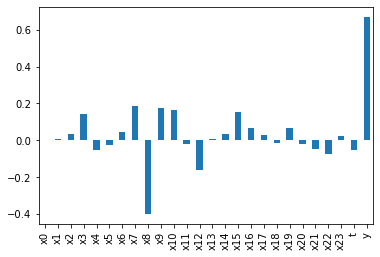

In [14]:
dfs_full['20000'][0].corr().iloc[0,1:].plot.bar()

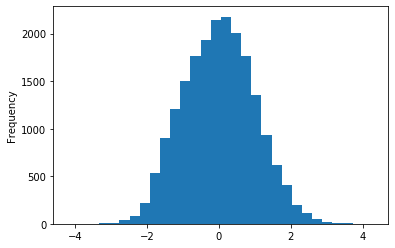

In [42]:
dfs_full['20000'][0].z.plot.hist(bins=30)

In [55]:
scipy.stats.norm.pdf(-1)

0.24197072451914337

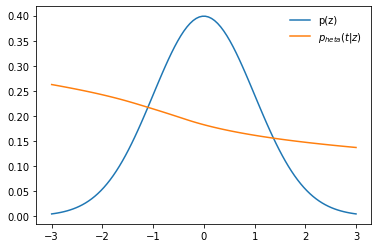

In [63]:
zspace = np.linspace(-3,3,100)
tpred = torch.sigmoid(model_zt(torch.Tensor([zspace]).T)).detach().numpy().squeeze()
plt.plot(zspace, scipy.stats.norm.pdf(zspace))
plt.plot(zspace, tpred)
plt.legend(["p(z)", "$p_{\theta}(t|z)$"], frameon=False)

# Plot stuff
- True pydot0 = 0, pydot1 = 0.5 or 1

In [15]:
pydot1_zdim10 = np.zeros((param_times, len(labels)))
pydot1_zdim1 = np.zeros((param_times, len(labels)))
pydot0_zdim10 = np.zeros((param_times, len(labels)))
pydot0_zdim1 = np.zeros((param_times, len(labels)))
pydot1_zdim10_ate1 = np.zeros((param_times*3, len(labels)))
pydot0_zdim10_ate1 = np.zeros((param_times*3, len(labels)))

for i,label in enumerate(map(str,labels)):
    print(label)
    for j in range(param_times):
        py_dot = estimate_model_py_dot(models_zdim10[label][j],n=10000)
        pydot1_zdim10[j,i] = py_dot[1]
        pydot0_zdim10[j,i] = py_dot[0]
        py_dot = estimate_model_py_dot(models_zdim1[label][j],n=10000)
        pydot1_zdim1[j,i] = py_dot[1]
        pydot0_zdim1[j,i] = py_dot[0]
        py_dot = estimate_model_py_dot(models_zdim10_ate1[label][j],n=10000)
        pydot1_zdim10_ate1[j,i] = py_dot[1]
        pydot0_zdim10_ate1[j,i] = py_dot[0]
    for j in range(param_times):
        py_dot = estimate_model_py_dot(models_zdim10_ate1_2[label][j],n=10000)
        pydot1_zdim10_ate1[param_times+j,i] = py_dot[1]
        pydot0_zdim10_ate1[param_times+j,i] = py_dot[0]
        py_dot = estimate_model_py_dot(models_zdim10_ate1_3[label][j],n=10000)
        pydot1_zdim10_ate1[param_times*2+j,i] = py_dot[1]
        pydot0_zdim10_ate1[param_times*2+j,i] = py_dot[0]

1
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


In [16]:
zvar_index = 5
ATE = 0.5
true_estimated_pydot1 = np.zeros(20)
true_estimated_pydot0 = np.zeros(20)
for i in range(20):
    df = generatedata(20000, proxymodel, model_zt, ATE, zvar_index)
    from sklearn.linear_model import LinearRegression
    lr1 = LinearRegression().fit(df['z'][df['t']==1].to_numpy()[:,None],df['y'][df['t']==1].to_numpy()[:,None])
    lr0 = LinearRegression().fit(df['z'][df['t']==0].to_numpy()[:,None],df['y'][df['t']==0].to_numpy()[:,None])
    true_pydot1 = lr1.predict(df['z'][:,None]).mean()
    true_pydot0 = lr0.predict(df['z'][:,None]).mean()
    true_estimated_pydot1[i] = true_pydot1
    true_estimated_pydot0[i] = true_pydot0

C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:11: Futu

C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:10: 

In [45]:
df = dfs['df20000'][0]
from sklearn.ensemble import RandomForestRegressor
cols = df.columns.str.startswith("x")
rf1 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==1], df["y"][df.t==1])
rf0 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==0], df["y"][df.t==0])
direct_pydot1 = rf1.predict(df.iloc[:,cols]).mean()
direct_pydot0 = rf0.predict(df.iloc[:,cols]).mean()

In [46]:
pc_pydot1 = df[df['t']==1]['y'].mean()
pc_pydot0 = df[df['t']==0]['y'].mean()

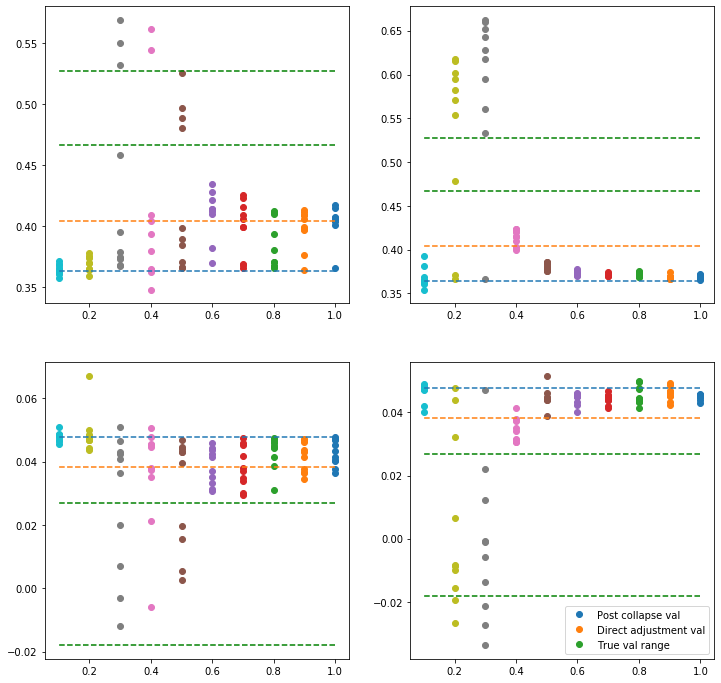

In [18]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
for i,label in enumerate(labels):
    ax[0,0].plot([label]*param_times, pydot1_zdim10[:,i], 'o')
    ax[0,1].plot([label]*param_times, pydot1_zdim1[:,i], 'o')
    ax[1,0].plot([label]*param_times, pydot0_zdim10[:,i], 'o')
    ax[1,1].plot([label]*param_times, pydot0_zdim1[:,i], 'o')
for i in range(2):
    ax[0,i].plot([labels[0],labels[-1]],[pc_pydot1, pc_pydot1], '--')
    ax[0,i].plot([labels[0],labels[-1]],[direct_pydot1, direct_pydot1], '--')
    ax[0,i].plot([labels[0],labels[-1]],[true_estimated_pydot1.max(), true_estimated_pydot1.max()], '--', c='green')
    ax[0,i].plot([labels[0],labels[-1]],[true_estimated_pydot1.min(), true_estimated_pydot1.min()], '--', c='green')
    
    ax[1,i].plot([labels[0],labels[-1]],[pc_pydot0, pc_pydot0], '--')
    ax[1,i].plot([labels[0],labels[-1]],[direct_pydot0, direct_pydot0], '--')
    ax[1,i].plot([labels[0],labels[-1]],[true_estimated_pydot0.max(), true_estimated_pydot0.max()], '--', c='green')
    ax[1,i].plot([labels[0],labels[-1]],[true_estimated_pydot0.min(), true_estimated_pydot0.min()], '--', c='green')

ax[1,1].legend(["Post collapse val", "Direct adjustment val", "True val range"])
plt.show()

## ATE=1

In [19]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"]})

### Plot aspects of the data generating process

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


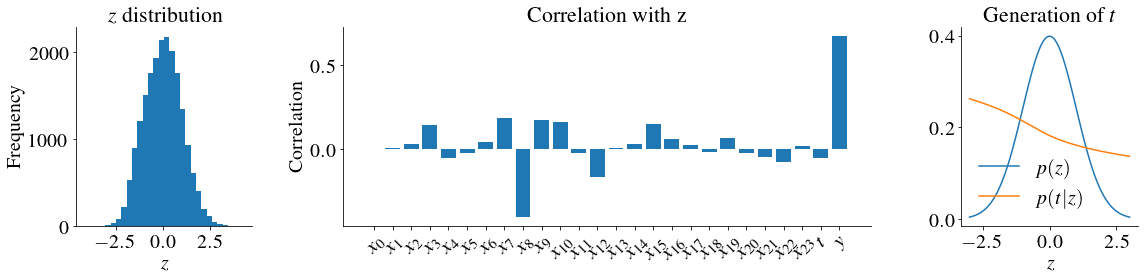

In [138]:
fig, ax = plt.subplots(1,3, figsize=(16,4),gridspec_kw={"width_ratios":[1,3,1]})

ax[0].hist(dfs_full['20000'][0].z, bins=30)
ax[0].set_title("$z$ distribution", fontsize=22)
ax[0].set_xlabel('$z$', fontsize=20)
ax[0].set_ylabel("Frequency", fontsize=20)
ax[0].tick_params(which='major', axis='both', labelsize=20)

correlations = dfs_full['20000'][0].corr().iloc[0,1:]
xlabels = [r"$x_{}$".format("{" + str(i) + "}")  for i in range(24)] + ['$t$','$y$']
ax[1].set_title("Correlation with z", fontsize=22)
ax[1].bar(xlabels, correlations)
ax[1].tick_params(which='major', axis='x', labelrotation=45, labelsize=20)
ax[1].tick_params(which='major', axis='y', labelsize=20)
ax[1].set_ylabel("Correlation", fontsize=20)

zspace = np.linspace(-3,3,100)
tpred = torch.sigmoid(model_zt(torch.Tensor([zspace]).T)).detach().numpy().squeeze()
ax[2].set_title("Generation of $t$", fontsize=22)
ax[2].plot(zspace, scipy.stats.norm.pdf(zspace))
ax[2].plot(zspace, tpred)
ax[2].legend(["$p(z)$", r"$p(t|z)$"], frameon=False, fontsize=20)
ax[2].tick_params(which='major', axis='both', labelsize=20)
ax[2].set_xlabel('$z$', fontsize=20)

for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig("Figures/publication/ihdp_datageneration.png",bbox_inches = 'tight',
    pad_inches = 0, dpi=200)
plt.show()

### Plot results

In [84]:
zvar_index = 5
ATE = 1
true_estimated_pydot1 = np.zeros(20)
true_estimated_pydot0 = np.zeros(20)
for i in range(20):
    df = generatedata(20000, proxymodel, model_zt, ATE, zvar_index)
    from sklearn.linear_model import LinearRegression
    lr1 = LinearRegression().fit(df['z'][df['t']==1].to_numpy()[:,None],df['y'][df['t']==1].to_numpy()[:,None])
    lr0 = LinearRegression().fit(df['z'][df['t']==0].to_numpy()[:,None],df['y'][df['t']==0].to_numpy()[:,None])
    true_pydot1 = lr1.predict(df['z'][:,None]).mean()
    true_pydot0 = lr0.predict(df['z'][:,None]).mean()
    true_estimated_pydot1[i] = true_pydot1
    true_estimated_pydot0[i] = true_pydot0

C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:11: Futu

C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:11: Futu

In [95]:
#THIS is the right cell to estimate the true p(y|do(t)) values for all experiments!
df = generatedata(1000000, proxymodel, model_zt, ATE, zvar_index)
lr1 = LinearRegression().fit(df['z'][df['t']==1].to_numpy()[:,None],df['y'][df['t']==1].to_numpy()[:,None])
lr0 = LinearRegression().fit(df['z'][df['t']==0].to_numpy()[:,None],df['y'][df['t']==0].to_numpy()[:,None])
true_pydot1 = lr1.predict(df['z'][:,None]).mean()
true_pydot0 = lr0.predict(df['z'][:,None]).mean()

#THIS is the part that estimates asymptotic direct estimate p(y|do(t))! Takes some time to run
df = generatedata(50000, proxymodel, model_zt, ATE, zvar_index)
from sklearn.ensemble import RandomForestRegressor
cols = df.columns.str.startswith("x")
rf1 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==1], df["y"][df.t==1])
rf0 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==0], df["y"][df.t==0])
asymptotic_direct_pydot1 = rf1.predict(df.iloc[:,cols]).mean()
asymptotic_direct_pydot0 = rf0.predict(df.iloc[:,cols]).mean()

C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
C:\Users\Severi\miniconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [96]:
#THIS is the part that estimates the direct estimate for p(y|do(t)) for data set used in the loss scaling tests!
df = dfs['df20000'][0]
from sklearn.ensemble import RandomForestRegressor
cols = df.columns.str.startswith("x")
rf1 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==1], df["y"][df.t==1])
rf0 = RandomForestRegressor().fit(df.iloc[:,cols].loc[df.t==0], df["y"][df.t==0])
direct_pydot1 = rf1.predict(df.iloc[:,cols]).mean()
direct_pydot0 = rf0.predict(df.iloc[:,cols]).mean()

#THIS is the part that gets the no adjustment estimate for data set used in the loss scaling tests
pc_pydot1 = df[df['t']==1]['y'].mean()
pc_pydot0 = df[df['t']==0]['y'].mean()

In [25]:
import seaborn as sns
palette = sns.color_palette("muted")
palette_2 = sns.color_palette("bright")
palette_3 = sns.color_palette("deep")

In [74]:
samplesize_labels = labels
scaling_labels = list(reversed([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]))

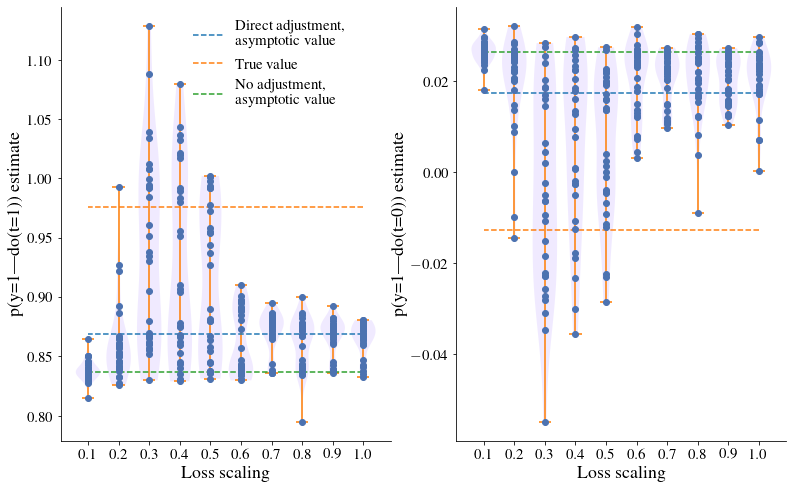

In [86]:
fig, ax = plt.subplots(1,2, figsize=(13,8), gridspec_kw = {'wspace':0.2, 'hspace':0})
#plt.subplots_adjust(wspace=40, hspace=0)

labels_int = scaling_labels#list(map(int, scaling_labels))

ax[0].plot([labels_int[0],labels_int[-1]],[direct_pydot1, direct_pydot1], '--')
ax[0].plot([labels_int[0],labels_int[-1]],[true_pydot1, true_pydot1], '--')
ax[0].plot([labels_int[0],labels_int[-1]],[pc_pydot1, pc_pydot1], '--')
#ax[0].plot([labels[0],labels[-1]],[true_estimated_pydot1.max(), true_estimated_pydot1.max()], '--', c='green')
#ax[0].plot([labels[0],labels[-1]],[true_estimated_pydot1.min(), true_estimated_pydot1.min()], '--', c='green')

ax[1].plot([labels_int[0],labels_int[-1]],[direct_pydot0, direct_pydot0], '--')
ax[1].plot([labels_int[0],labels_int[-1]],[true_pydot0, true_pydot0], '--')
ax[1].plot([labels_int[0],labels_int[-1]],[pc_pydot0, pc_pydot0], '--')
#ax[1].plot([labels[0],labels[-1]],[true_estimated_pydot0.max(), true_estimated_pydot0.max()], '--', c='green')
#ax[1].plot([labels[0],labels[-1]],[true_estimated_pydot0.min(), true_estimated_pydot0.min()], '--', c='green')

ax[0].legend(["Direct adjustment,\nasymptotic value",
              "True value","No adjustment,\nasymptotic value"], frameon=False, fontsize=15,
            bbox_to_anchor=(0.36,1), loc="upper left")

for i,label in enumerate(labels_int):
    ax[0].plot([label]*param_times*3, pydot1_zdim10_ate1[:,i], 'o', color=palette_3[0])
    ax[1].plot([label]*param_times*3, pydot0_zdim10_ate1[:,i], 'o', color=palette_3[0])
    parts1 = ax[0].violinplot(pydot1_zdim10_ate1[:,i], [label],widths=0.08)
    parts0 = ax[1].violinplot(pydot0_zdim10_ate1[:,i], [label],widths=0.08)
    for pc in parts0['bodies']:
        pc.set_facecolor(palette[4])
    for pc in parts1['bodies']:
        pc.set_facecolor(palette[4])
    edgecoloridx = 1
    parts0['cbars']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cbars']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts0['cmaxes']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmaxes']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts0['cmins']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmins']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    #for pc in parts1['cbars']:
    #    pc.set_edgecolor(palette[1])
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax[1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
#ax[0].set_title("p(y=1|do(t=1)) estimate", fontsize=18)
#ax[1].set_title("p(y=1|do(t=0)) estimate", fontsize=18)
ax[0].set_xlabel("Loss scaling", fontsize=18)
ax[1].set_xlabel("Loss scaling", fontsize=18)
ax[0].set_ylabel("p(y=1|do(t=1)) estimate", fontsize=18)
ax[1].set_ylabel("p(y=1|do(t=0)) estimate", fontsize=18)
for i in range(2):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
#plt.tight_layout()
#plt.savefig("Figures/publication/ihdp_losscaling_ate1.png",bbox_inches = 'tight',
#    pad_inches = 0, dpi=200)
plt.show()

In [191]:
parts1['cbars']._edgecolors
parts0

{'bodies': [<matplotlib.collections.PolyCollection at 0x20e08ee2408>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20e08f1f708>,
 'cmins': <matplotlib.collections.LineCollection at 0x20e08ee29c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x20e08f17848>}

In [87]:
true_estimated_pydot1.max()

1.0275516510009766

# Convergence

In [54]:
sub_folder_data = "ATE1samplesize1000to20000"
ATE = 1
zvar_index = 5
datasize = [1000,2000,3000,5000,10000,15000,20000]
dataparameters = [[num_samples, proxymodel, model_zt, ATE, zvar_index] for num_samples in datasize]
generate_df = generatedata
param_times=10
data_labels = list(map(str, datasize))

In [55]:
dfs, datasets = load_dfs(main_folder, sub_folder_data, param_times)

In [56]:
device = 'cpu'
num_epochs=200
lr_start=0.001
lr_end=0.00001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=0
x_mode=np.delete(np.array([0]*3+[4]+[0]*2+[2]*(original_data_dim-6)),zvar_index)
x_dim = len(x_mode)
ty_separate_enc=True
z_mode=0
x_loss_scaling=1
labels = data_labels
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
sub_folder_model = "ATE1zdim10samplesize1000to20000"
labels = data_labels

models, losses = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [57]:
pydot1_ate1 = np.zeros((param_times, len(labels)))
pydot0_ate1 = np.zeros((param_times, len(labels)))

for i,label in enumerate(map(str,labels)):
    print(label)
    for j in range(param_times):
        py_dot = estimate_model_py_dot(models[label][j],n=10000)
        pydot1_ate1[j,i] = py_dot[1]
        pydot0_ate1[j,i] = py_dot[0]

1000
2000
3000
5000
10000
15000
20000


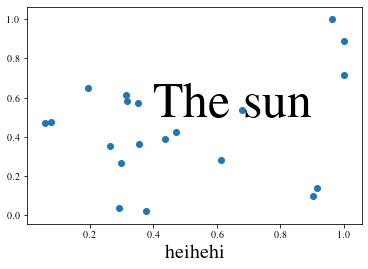

In [20]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"]})
plt.figure()
plt.scatter(np.random.random(20),np.random.random(20))
plt.xlabel("heihehi", fontsize=20)
plt.text(0.4,0.5,"The sun", fontsize=50)
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


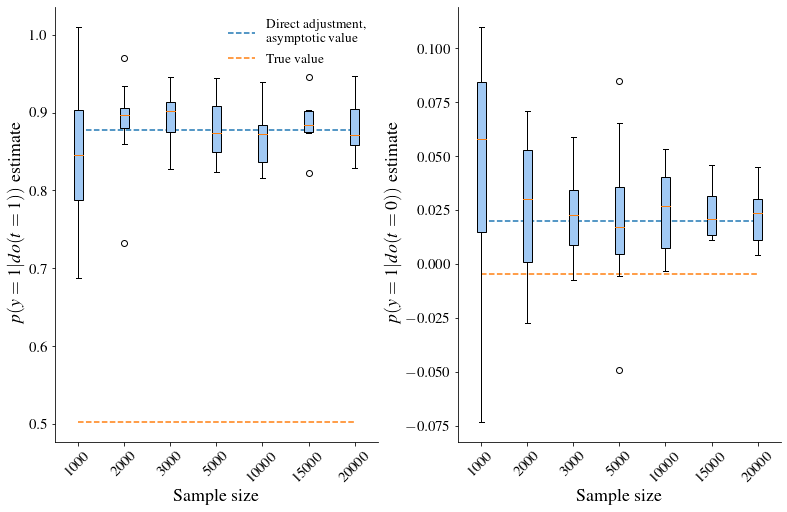

In [58]:
import seaborn as sns
from matplotlib.patches import Patch
fig, ax = plt.subplots(1,2,figsize=(13,8), gridspec_kw = {'wspace':0.25, 'hspace':0})
places = list(range(len(labels)))
width = 0.2
palette = sns.color_palette("pastel")
ax[0].plot([places[0],places[-1]],[direct_pydot1,direct_pydot1],'--')
ax[1].plot([places[0],places[-1]],[direct_pydot0,direct_pydot0],'--')
ax[0].plot([places[0],places[-1]],[true_pydot1,true_pydot1],'--')
ax[1].plot([places[0],places[-1]],[true_pydot0,true_pydot0],'--')
ax[0].legend(["Direct adjustment,\nasymptotic value","True value"], frameon=False, fontsize=13.5)
# ax[0].set_title("p(y=1|do(t=1)) estimate", fontsize=18)
# ax[1].set_title("p(y=1|do(t=0)) estimate", fontsize=18)
ax[0].set_ylabel("$p(y=1|do(t=1))$ estimate", fontsize=18)
ax[1].set_ylabel("$p(y=1|do(t=0))$ estimate", fontsize=18)
ax[0].set_xlabel("Sample size", fontsize=18)
ax[1].set_xlabel("Sample size", fontsize=18)

ax[1].tick_params(axis='both', which='major', labelsize=15)
for i in range(2):
    ax[i].tick_params(axis='x', which='major', labelsize=15, rotation=45)
    ax[i].tick_params(axis='y', which='major', labelsize=15)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

for k,pydot in enumerate([pydot1_ate1,pydot0_ate1]):
    for i in range(len(labels)):
        bplot = ax[k].boxplot(pydot[:,i], positions=[places[i]], widths=[width], patch_artist=True)
        color = palette[0]
        for patch in bplot['boxes']:
            patch.set_facecolor(color)
    ax[k].set_xticks(places)
    ax[k].set_xticklabels(datasize)
    custom_line = Patch(facecolor=palette[0], edgecolor='black')

#plt.tight_layout()
#plt.savefig("Figures/publication/realdata_convergence_ate1.png", bbox_inches = 'tight', pad_inches = 0.0, dpi=200)
plt.show()

In [35]:
samplesize_labels = labels
scaling_labels = list(reversed([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]))

In [36]:
palette = sns.color_palette("muted")
palette_2 = sns.color_palette("bright")
palette_3 = sns.color_palette("deep")

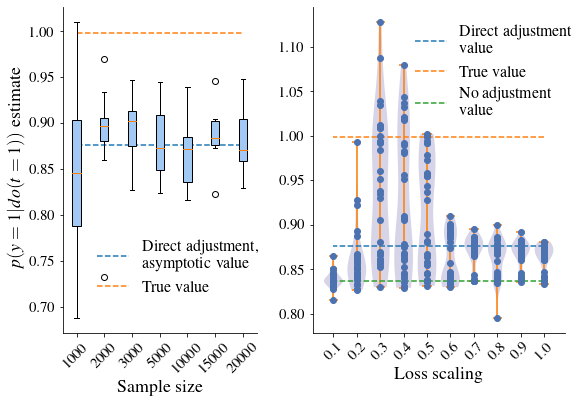

In [102]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1,2,figsize=(9,6), gridspec_kw = {'wspace':0.25, 'hspace':0, 'width_ratios': [1, 1.3]})
samplesize_places = list(range(len(samplesize_labels)))
scaling_places = list(range(len(scaling_labels)))
width = 0.3

palette = sns.color_palette("pastel")
ax[0].plot([samplesize_places[0],samplesize_places[-1]],[asymptotic_direct_pydot1,asymptotic_direct_pydot1],'--')
ax[0].plot([samplesize_places[0],samplesize_places[-1]],[true_pydot1,true_pydot1],'--')
ax[0].legend(["Direct adjustment,\nasymptotic value","True value"], frameon=False, fontsize=16,
            loc="right", bbox_to_anchor=(1.09,0.2))
ax[0].set_ylabel("$p(y=1|do(t=1))$ estimate", fontsize=18)
ax[0].set_xlabel("Sample size", fontsize=18)

for i in range(len(samplesize_places)):
    bplot = ax[0].boxplot(pydot1_ate1[:,i], positions=[samplesize_places[i]], widths=[width], patch_artist=True)
    color = palette[0]
    for patch in bplot['boxes']:
        patch.set_facecolor(color)
ax[0].set_xticks(samplesize_places)
ax[0].set_xticklabels(datasize)
custom_line = Patch(facecolor=palette[0], edgecolor='black')

ax[1].plot([scaling_labels[0],scaling_labels[-1]],[direct_pydot1, direct_pydot1], '--')
ax[1].plot([scaling_labels[0],scaling_labels[-1]],[true_pydot1, true_pydot1], '--')
ax[1].plot([scaling_labels[0],scaling_labels[-1]],[pc_pydot1, pc_pydot1], '--')
for i,label in enumerate(scaling_labels):
    ax[1].plot([label]*param_times*3, pydot1_zdim10_ate1[:,i], 'o', color=palette_3[0])
    parts1 = ax[1].violinplot(pydot1_zdim10_ate1[:,i], [label],widths=0.08)
    #for pc in parts0['bodies']:
    #    pc.set_facecolor(palette[4])
    for pc in parts1['bodies']:
        pc.set_facecolor(palette_3[4])
    edgecoloridx = 1
    parts1['cbars']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmaxes']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmins']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
ax[1].set_xlabel("Loss scaling", fontsize=18)
ax[1].set_xticks(scaling_labels)

ax[1].legend(["Direct adjustment\nvalue",
              "True value","No adjustment\nvalue"], frameon=False, fontsize=16, loc="right", 
             bbox_to_anchor=(1.09,0.8))

for i in range(2):
    ax[i].tick_params(axis='x', which='major', labelsize=15, rotation=45)
    ax[i].tick_params(axis='y', which='major', labelsize=15)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
plt.savefig("Figures/publication/ihdp_mainresults.png", bbox_inches = 'tight', pad_inches = 0.0, dpi=200)
plt.show()

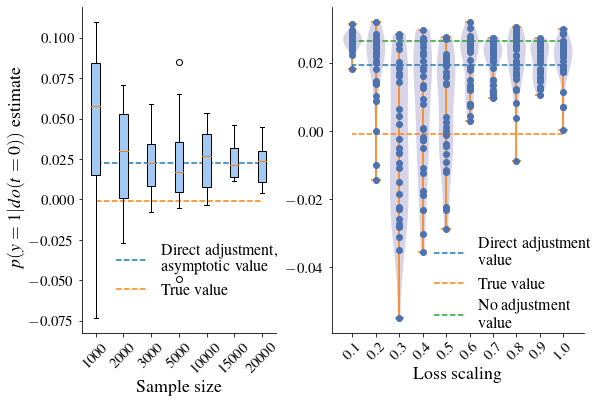

In [128]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1,2,figsize=(9,6), gridspec_kw = {'wspace':0.25, 'hspace':0, 'width_ratios': [1, 1.3]})
samplesize_places = list(range(len(samplesize_labels)))
scaling_places = list(range(len(scaling_labels)))
width = 0.3

palette = sns.color_palette("pastel")
ax[0].plot([samplesize_places[0],samplesize_places[-1]],[asymptotic_direct_pydot0,asymptotic_direct_pydot0],'--')
ax[0].plot([samplesize_places[0],samplesize_places[-1]],[true_pydot0,true_pydot0],'--')
ax[0].legend(["Direct adjustment,\nasymptotic value","True value"], frameon=False, fontsize=16,
            loc="right", bbox_to_anchor=(1.09,0.19))
ax[0].set_ylabel("$p(y=1|do(t=0))$ estimate", fontsize=18)
ax[0].set_xlabel("Sample size", fontsize=18)

for i in range(len(samplesize_places)):
    bplot = ax[0].boxplot(pydot0_ate1[:,i], positions=[samplesize_places[i]], widths=[width], patch_artist=True)
    color = palette[0]
    for patch in bplot['boxes']:
        patch.set_facecolor(color)
ax[0].set_xticks(samplesize_places)
ax[0].set_xticklabels(datasize)
custom_line = Patch(facecolor=palette[0], edgecolor='black')

ax[1].plot([scaling_labels[0],scaling_labels[-1]],[direct_pydot0, direct_pydot0], '--')
ax[1].plot([scaling_labels[0],scaling_labels[-1]],[true_pydot0, true_pydot0], '--')
ax[1].plot([scaling_labels[0],scaling_labels[-1]],[pc_pydot0, pc_pydot0], '--')
for i,label in enumerate(scaling_labels):
    ax[1].plot([label]*param_times*3, pydot0_zdim10_ate1[:,i], 'o', color=palette_3[0])
    parts1 = ax[1].violinplot(pydot0_zdim10_ate1[:,i], [label],widths=0.08)
    #for pc in parts0['bodies']:
    #    pc.set_facecolor(palette[4])
    for pc in parts1['bodies']:
        pc.set_facecolor(palette_3[4])
    edgecoloridx = 1
    parts1['cbars']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmaxes']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmins']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
ax[1].set_xlabel("Loss scaling", fontsize=18)
ax[1].set_xticks(scaling_labels)

ax[1].legend(["Direct adjustment\nvalue",
              "True value","No adjustment\nvalue"], frameon=False, fontsize=16, loc="right", 
             bbox_to_anchor=(1.09,0.15))

for i in range(2):
    ax[i].tick_params(axis='x', which='major', labelsize=15, rotation=45)
    ax[i].tick_params(axis='y', which='major', labelsize=15)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
plt.savefig("Figures/publication/ihdp_supplementresults.png", bbox_inches = 'tight', pad_inches = 0.0, dpi=200)
plt.show()

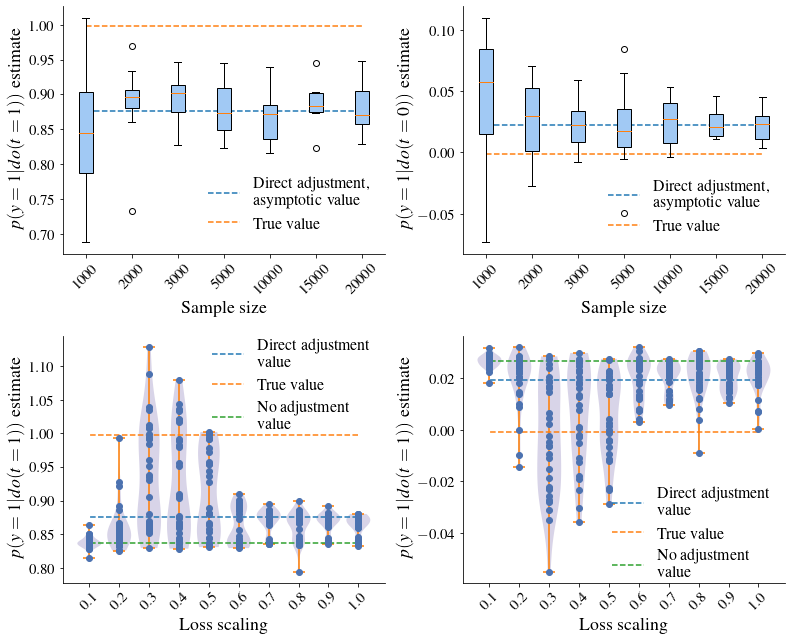

In [134]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(2,2,figsize=(11,9))
samplesize_places = list(range(len(samplesize_labels)))
scaling_places = list(range(len(scaling_labels)))
width = 0.3

palette = sns.color_palette("pastel")
ax[0,0].plot([samplesize_places[0],samplesize_places[-1]],[asymptotic_direct_pydot1,asymptotic_direct_pydot1],'--')
ax[0,0].plot([samplesize_places[0],samplesize_places[-1]],[true_pydot1,true_pydot1],'--')
ax[0,0].legend(["Direct adjustment,\nasymptotic value","True value"], frameon=False, fontsize=16,
            loc="right", bbox_to_anchor=(1.0,0.2))
ax[0,0].set_ylabel("$p(y=1|do(t=1))$ estimate", fontsize=18)
ax[0,0].set_xlabel("Sample size", fontsize=18)

for i in range(len(samplesize_places)):
    bplot = ax[0,0].boxplot(pydot1_ate1[:,i], positions=[samplesize_places[i]], widths=[width], patch_artist=True)
    color = palette[0]
    for patch in bplot['boxes']:
        patch.set_facecolor(color)
ax[0,0].set_xticks(samplesize_places)
ax[0,0].set_xticklabels(datasize)
custom_line = Patch(facecolor=palette[0], edgecolor='black')

palette = sns.color_palette("pastel")
ax[0,1].plot([samplesize_places[0],samplesize_places[-1]],[asymptotic_direct_pydot0,asymptotic_direct_pydot0],'--')
ax[0,1].plot([samplesize_places[0],samplesize_places[-1]],[true_pydot0,true_pydot0],'--')
ax[0,1].legend(["Direct adjustment,\nasymptotic value","True value"], frameon=False, fontsize=16,
            loc="right", bbox_to_anchor=(1.0,0.19))
ax[0,1].set_ylabel("$p(y=1|do(t=0))$ estimate", fontsize=18)
ax[0,1].set_xlabel("Sample size", fontsize=18)

for i in range(len(samplesize_places)):
    bplot = ax[0,1].boxplot(pydot0_ate1[:,i], positions=[samplesize_places[i]], widths=[width], patch_artist=True)
    color = palette[0]
    for patch in bplot['boxes']:
        patch.set_facecolor(color)
ax[0,1].set_xticks(samplesize_places)
ax[0,1].set_xticklabels(datasize)
custom_line = Patch(facecolor=palette[0], edgecolor='black')


ax[1,0].plot([scaling_labels[0],scaling_labels[-1]],[direct_pydot1, direct_pydot1], '--')
ax[1,0].plot([scaling_labels[0],scaling_labels[-1]],[true_pydot1, true_pydot1], '--')
ax[1,0].plot([scaling_labels[0],scaling_labels[-1]],[pc_pydot1, pc_pydot1], '--')
for i,label in enumerate(scaling_labels):
    ax[1,0].plot([label]*param_times*3, pydot1_zdim10_ate1[:,i], 'o', color=palette_3[0])
    parts1 = ax[1,0].violinplot(pydot1_zdim10_ate1[:,i], [label],widths=0.08)
    #for pc in parts0['bodies']:
    #    pc.set_facecolor(palette[4])
    for pc in parts1['bodies']:
        pc.set_facecolor(palette_3[4])
    edgecoloridx = 1
    parts1['cbars']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmaxes']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmins']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
ax[1,0].set_xlabel("Loss scaling", fontsize=18)
ax[1,0].set_ylabel("$p(y=1|do(t=1))$ estimate", fontsize=18)
ax[1,0].set_xticks(scaling_labels)

ax[1,0].legend(["Direct adjustment\n value",
              "True value","No adjustment\nvalue"], frameon=False, fontsize=16, loc="right", 
             bbox_to_anchor=(1.0,0.8))

ax[1,1].plot([scaling_labels[0],scaling_labels[-1]],[direct_pydot0, direct_pydot0], '--')
ax[1,1].plot([scaling_labels[0],scaling_labels[-1]],[true_pydot0, true_pydot0], '--')
ax[1,1].plot([scaling_labels[0],scaling_labels[-1]],[pc_pydot0, pc_pydot0], '--')
for i,label in enumerate(scaling_labels):
    ax[1,1].plot([label]*param_times*3, pydot0_zdim10_ate1[:,i], 'o', color=palette_3[0])
    parts1 = ax[1,1].violinplot(pydot0_zdim10_ate1[:,i], [label],widths=0.08)
    #for pc in parts0['bodies']:
    #    pc.set_facecolor(palette[4])
    for pc in parts1['bodies']:
        pc.set_facecolor(palette_3[4])
    edgecoloridx = 1
    parts1['cbars']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmaxes']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
    parts1['cmins']._edgecolors = np.array([list(palette_2[edgecoloridx]) + [1]])
ax[1,1].set_xlabel("Loss scaling", fontsize=18)
ax[1,1].set_ylabel("$p(y=1|do(t=1))$ estimate", fontsize=18)
ax[1,1].set_xticks(scaling_labels)

ax[1,1].legend(["Direct adjustment\nvalue",
              "True value","No adjustment\nvalue"], frameon=False, fontsize=16, loc="right", 
             bbox_to_anchor=(1.0,0.2))


for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(axis='x', which='major', labelsize=15, rotation=45)
        ax[i,j].tick_params(axis='y', which='major', labelsize=15)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig("Figures/thesis/ihdp_results.png", bbox_inches = 'tight', pad_inches = 0.0, dpi=200)
plt.show()